In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/online_advertising_performance_data.csv')

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [ ]:
df.shape

(15408, 14)

In [ ]:
df.describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
count,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,0.0,0.0
mean,15.518886,15512.573014,11.370262,161.788487,17.929943,42.300623,2123.288058,NaN,NaN
std,8.740909,44392.392890,45.369499,728.276911,96.781834,213.685660,10523.029607,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,8.000000,78.000000,0.024000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,15.000000,1182.000000,0.339850,6.000000,0.483950,0.000000,0.000000,NaN,NaN
75%,23.000000,8960.250000,2.536225,53.000000,3.839800,3.000000,163.351200,NaN,NaN
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,NaN,NaN


In [ ]:
df.dtypes

,0
month,object
day,int64
campaign_number,object
user_engagement,object
banner,object
placement,object
displays,int64
cost,float64
clicks,int64
revenue,float64


In [ ]:
col=list(df.columns)

#Check for duplicates

In [ ]:
df.duplicated().sum()

5

In [ ]:
df=df.drop_duplicates(keep='first')

Insights that we have driven



*   There are a lot of null values
*   There are a lot of categorical values that means we will need encoding


#Information Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15403 non-null  object 
 1   day                      15403 non-null  int64  
 2   campaign_number          15403 non-null  object 
 3   user_engagement          15403 non-null  object 
 4   banner                   15403 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 15403 non-null  int64  
 7   cost                     15403 non-null  float64
 8   clicks                   15403 non-null  int64  
 9   revenue                  15403 non-null  float64
 10  post_click_conversions   15403 non-null  int64  
 11  post_click_sales_amount  15403 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4), ob

# Using boxplot we would be able to detect outliers

In [ ]:
#for col_name in col:
 # if df[col_name].dtype=='int64' or df[col_name].dtype=='float64':
   # sns.boxplot(df[col_name])
   # plt.xlabel(col_name)
   # plt.ylabel('count')
   # plt.show()


Based on our observations we find these columns to have outliers

* Displays  
*   Cost


*   clicks
*   Revenue

*   post click conversions
*   post_click_sales_amount







In [ ]:
q1=df['displays'].quantile(0.25)
q3=df['displays'].quantile(0.75)
iqr=q3-q1
df=df[(df['displays']>=q1-1.5*iqr)|(df['displays']<=q3+1.5*iqr)]

In [ ]:
p1=df['cost'].quantile(0.25)
p3=df['cost'].quantile(0.75)
iqr=p3-p1
df=df[(df['cost']>=p1-1.5*iqr)|(df['cost']<=p3+1.5*iqr)]

In [ ]:
s1=df['clicks'].quantile(0.25)
s3=df['clicks'].quantile(0.75)
iqr=s3-s1
df=df[(df['clicks']>=s1-1.5*iqr)|(df['clicks']<=s3+1.5*iqr)]

In [ ]:
t1=df['revenue'].quantile(0.25)
t3=df['revenue'].quantile(0.75)
iqr=t3-t1
df=df[(df['revenue']>=t1-1.5*iqr)|(df['revenue']<=t3+1.5*iqr)]

In [ ]:
b1=df['post_click_conversions'].quantile(0.25)
b3=df['post_click_conversions'].quantile(0.75)
iqr=b3-b1
df=df[(df['post_click_conversions']>=b1-1.5*iqr)|(df['post_click_conversions']<=b3+1.5*iqr)]

In [ ]:
a1=df['post_click_conversions'].quantile(0.25)
a3=df['post_click_conversions'].quantile(0.75)
iqr=a3-a1
df=df[(df['post_click_conversions']>=a1-1.5*iqr)|(df['post_click_conversions']<=a3+1.5*iqr)]

In [ ]:
f1=df['post_click_sales_amount'].quantile(0.25)
f3=df['post_click_sales_amount'].quantile(0.75)
iqr=f3-f1
df=df[(df['post_click_sales_amount']>=f1-1.5*iqr)&(df['post_click_sales_amount']<=f3+1.5*iqr)]


In [ ]:
#for col_name in col:
 # if (df[col_name].dtype=='int64') or (df[col_name].dtype=='float64'):
 #   sns.boxplot(df[col_name])
 #   plt.xlabel(col_name)
  #  plt.ylabel('count')
  #  plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
s=df.loc[:,'displays': ]

In [ ]:
scaled_data=scaler.fit_transform(s)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
scaled_data

array([[-0.37253217, -0.45958665, -0.35531148, ..., -0.37514668,
                nan,         nan],
       [-0.32762885, -0.42494526, -0.34047716, ..., -0.37514668,
                nan,         nan],
       [-0.37154889, -0.4488535 , -0.35531148, ..., -0.37514668,
                nan,         nan],
       ...,
       [-0.33270915, -0.36724747, -0.23663692, ..., -0.37514668,
                nan,         nan],
       [ 2.72366656,  1.01483044,  2.53738093, ..., -0.37514668,
                nan,         nan],
       [-0.37236829, -0.46026812, -0.35531148, ..., -0.37514668,
                nan,         nan]])

In [ ]:
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,413
displays,0
cost,0
clicks,0
revenue,0


#Feature Enginnering

Create new features that can add predictive value:

CTR (Click-Through Rate):
CTR
=
Clicks
Displays
CTR=
Displays
Clicks
​

CPC (Cost Per Click):
CPC
=
Cost
Clicks
CPC=
Clicks
Cost
​

ROI (Return on Investment):
ROI
=
Revenue
Cost
ROI=
Cost
Revenue
​


In [ ]:
df['CTR'] = df['clicks'] / df['displays'].replace(0, np.nan)
df['CPC'] = df['cost'] / df['clicks'].replace(0, np.nan)
df['ROI'] = df['revenue'] / df['cost'].replace(0, np.nan)

In [ ]:
col_list=df.columns

In [ ]:
col_list

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Unnamed: 12',
       'Unnamed: 13', 'CTR', 'CPC', 'ROI'],
      dtype='object')

In [ ]:
for col  in col_list:
  if df[col].dtypes=='object':
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())


# dropping the null values and the user has puchased in all the columns



In [ ]:
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,0
displays,0
cost,0
clicks,0
revenue,0


In [ ]:
df.dropna().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,0
displays,0
cost,0.0
clicks,0
revenue,0.0


In [ ]:
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,0
displays,0
cost,0
clicks,0
revenue,0


#Chi :A method for feature selection

In [ ]:
a=df.shape
print(f"There are {a[0]} rows and {a[1]}columns")

There are 12414 rows and 17columns


**We need to do encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col_list=['month','day','campaign_number','user_engagement','banner','placement']

In [ ]:
le=LabelEncoder()

In [ ]:
for i in col_list:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13,CTR,CPC,ROI
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,NaN,NaN,0.000000,0.069770,0.000000
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,NaN,NaN,0.001812,0.067000,2.737313
5,0,0,0,1,0,2,16,0.0249,0,0.0000,0,0.0000,NaN,NaN,0.000000,0.069770,0.000000
6,0,0,0,1,0,4,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN,0.004476,0.040440,4.536845
7,0,0,0,2,0,1,2963,1.8899,4,0.7338,4,100.5044,NaN,NaN,0.001350,0.472475,0.388275


In [ ]:
df=df.drop('Unnamed: 12',axis=1)

In [ ]:
df=df.drop('Unnamed: 13',axis=1)

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR,CPC,ROI
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,0.001812,0.067000,2.737313
5,0,0,0,1,0,2,16,0.0249,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
6,0,0,0,1,0,4,2234,0.4044,10,1.8347,3,101.7494,0.004476,0.040440,4.536845
7,0,0,0,2,0,1,2963,1.8899,4,0.7338,4,100.5044,0.001350,0.472475,0.388275


In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

x=df.iloc[:,::-4]
y=df.iloc[:,-4]
df.head()


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR,CPC,ROI
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,0.001812,0.067000,2.737313
5,0,0,0,1,0,2,16,0.0249,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
6,0,0,0,1,0,4,2234,0.4044,10,1.8347,3,101.7494,0.004476,0.040440,4.536845
7,0,0,0,2,0,1,2963,1.8899,4,0.7338,4,100.5044,0.001350,0.472475,0.388275


In [ ]:
x

,ROI,post_click_conversions,displays,campaign_number
0,0.000000,0,4,0
4,2.737313,0,552,0
5,0.000000,0,16,0
6,4.536845,3,2234,0
7,0.388275,4,2963,0
...,...,...,...,...
15398,2.855530,3,5963,2
15399,1.255295,0,710,2
15400,2.671412,0,490,2
15401,4.218768,0,37790,2


In [ ]:
y

,post_click_sales_amount
0,0.0000
4,0.0000
5,0.0000
6,101.7494
7,100.5044
...,...
15398,69.4256
15399,0.0000
15400,0.0000
15401,0.0000


In [ ]:
y=y.astype(int)

In [ ]:
chi2_feature=SelectKBest(chi2,k=5)

In [ ]:
print(type(y))  # Should be a Pandas Series or a Numpy array
print(y.shape)  # Should be (n_samples,)
print(y.dtype)  # Should be float or int for regression


<class 'pandas.core.series.Series'>
(12414,)
int64


In [ ]:
y = y.ravel()  # Converts to 1D array


<ipython-input-1297-9fac84c18420>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()  # Converts to 1D array


In [ ]:
x_Best_feature=chi2_feature.fit_transform(x,y)
print("Selected indices:",chi2_feature.get_support(indices=True))
selected_indices=chi2_feature.get_support(indices=True)
selected_indices
column_names=x.columns


Selected indices: [0 1 2 3]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


In [ ]:
selected_column_names=[column_names[i] for i  in selected_indices]
selected_column_names

['ROI', 'post_click_conversions', 'displays', 'campaign_number']

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR,CPC,ROI
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,0.001812,0.067000,2.737313
5,0,0,0,1,0,2,16,0.0249,0,0.0000,0,0.0000,0.000000,0.069770,0.000000
6,0,0,0,1,0,4,2234,0.4044,10,1.8347,3,101.7494,0.004476,0.040440,4.536845
7,0,0,0,2,0,1,2963,1.8899,4,0.7338,4,100.5044,0.001350,0.472475,0.388275


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='post_click_sales_amount')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                  Features        VIF
0                    month   2.061019
1                      day   3.245490
2          campaign_number   2.498262
3          user_engagement   2.946981
4                   banner   3.193146
5                placement   4.033343
6                 displays   2.986067
7                     cost   4.879523
8                   clicks   9.403221
9                  revenue  11.866440
10  post_click_conversions   1.806450
11                     CTR   1.499157
12                     CPC   2.187095
13                     ROI   1.484843


In [ ]:
df=df.drop('revenue',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='post_click_sales_amount')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                  Features       VIF
0                    month  2.056743
1                      day  3.243760
2          campaign_number  2.420511
3          user_engagement  2.740286
4                   banner  3.190049
5                placement  4.027963
6                 displays  2.904983
7                     cost  4.432542
8                   clicks  4.437335
9   post_click_conversions  1.699878
10                     CTR  1.498525
11                     CPC  2.165007
12                     ROI  1.479241


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
rfe=RFE(model)

In [ ]:
x=df.iloc[:,::-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
rfe.fit(x,y)

RFE(estimator=LinearRegression())

In [ ]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True])

In [ ]:
selected_indices=[i for i,data in enumerate(rfe.support_)if data==True]

In [ ]:
selected_indices

[0, 1, 2, 8, 10, 11, 13]

In [ ]:
column_names=x.columns

In [ ]:

selected_columns=[column_names[i] for i in selected_indices]

In [ ]:
selected_columns

['ROI',
 'CPC',
 'CTR',
 'placement',
 'user_engagement',
 'campaign_number',
 'month']

#Exploratory Data Analysis

In [ ]:
df.describe()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_conversions,post_click_sales_amount,CTR,CPC,ROI
count,12414.000000,12414.000000,12414.000000,12414.000000,12414.000000,12414.00000,12414.000000,12414.000000,12414.000000,12414.000000,12414.000000,12414.000000,12414.000000,12414.000000
mean,0.903496,14.561946,1.156758,1.122926,3.277268,2.37071,4550.381505,0.815286,23.951990,0.577332,27.803887,0.007408,0.069770,1.981672
std,0.834698,8.725372,0.936773,0.765106,2.137421,1.32480,12204.488573,1.760970,67.413961,1.591164,74.117695,0.035003,0.064786,10.609307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,1.000000,2.000000,1.00000,35.000000,0.014300,0.000000,0.000000,0.000000,0.000000,0.031906,0.000000
50%,1.000000,14.000000,2.000000,1.000000,3.000000,2.00000,456.000000,0.151700,2.000000,0.000000,0.000000,0.002386,0.069770,0.618421
75%,2.000000,22.000000,2.000000,2.000000,5.000000,4.00000,2983.000000,0.777125,16.000000,0.000000,0.000000,0.006931,0.069770,2.222733
max,2.000000,30.000000,2.000000,2.000000,7.000000,4.00000,174462.000000,29.808500,1436.000000,21.000000,407.899500,1.393939,1.241500,538.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,12414.0,0.903496,0.834698,0.0,0.000000,1.000000,2.000000,2.000000
day,12414.0,14.561946,8.725372,0.0,7.000000,14.000000,22.000000,30.000000
campaign_number,12414.0,1.156758,0.936773,0.0,0.000000,2.000000,2.000000,2.000000
user_engagement,12414.0,1.122926,0.765106,0.0,1.000000,1.000000,2.000000,2.000000
banner,12414.0,3.277268,2.137421,0.0,2.000000,3.000000,5.000000,7.000000
placement,12414.0,2.370710,1.324800,0.0,1.000000,2.000000,4.000000,4.000000
displays,12414.0,4550.381505,12204.488573,0.0,35.000000,456.000000,2983.000000,174462.000000
cost,12414.0,0.815286,1.760970,0.0,0.014300,0.151700,0.777125,29.808500
clicks,12414.0,23.951990,67.413961,0.0,0.000000,2.000000,16.000000,1436.000000
post_click_conversions,12414.0,0.577332,1.591164,0.0,0.000000,0.000000,0.000000,21.000000


**Insights:**


*   Average revenue generated is 883.63
*   Average day is of 14.56 and median is 14


*   Day column can be a normally distributed column






**Visualisations**

<ipython-input-1318-e30af424f04d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='campaign_number', y='clicks', ci=None, palette='muted')
<ipython-input-1318-e30af424f04d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='campaign_number', y='clicks', ci=None, palette='muted')


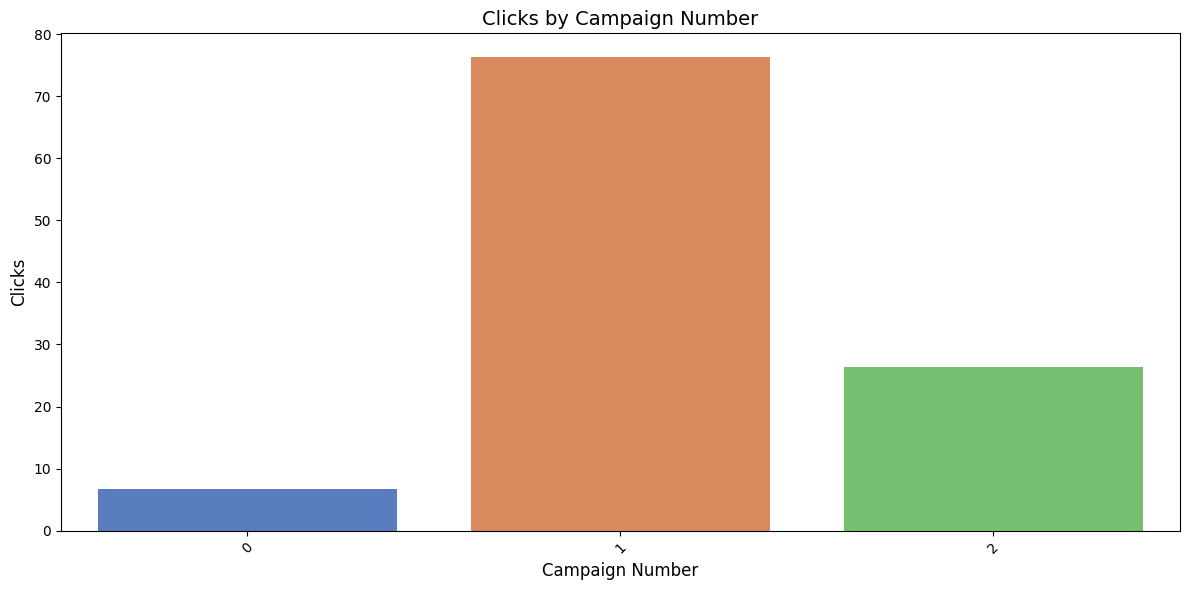

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='campaign_number', y='clicks', ci=None, palette='muted')
plt.title("Clicks by Campaign Number", fontsize=14)
plt.xlabel("Campaign Number", fontsize=12)
plt.ylabel("Clicks", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['clicks'].sum()

297340

**Insights**

*   Highest clicks that is being generated is by Campaign Number 2




<ipython-input-1320-5e529658f283>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_engagement', y='clicks', data=clicks_by_engagement, palette='coolwarm')


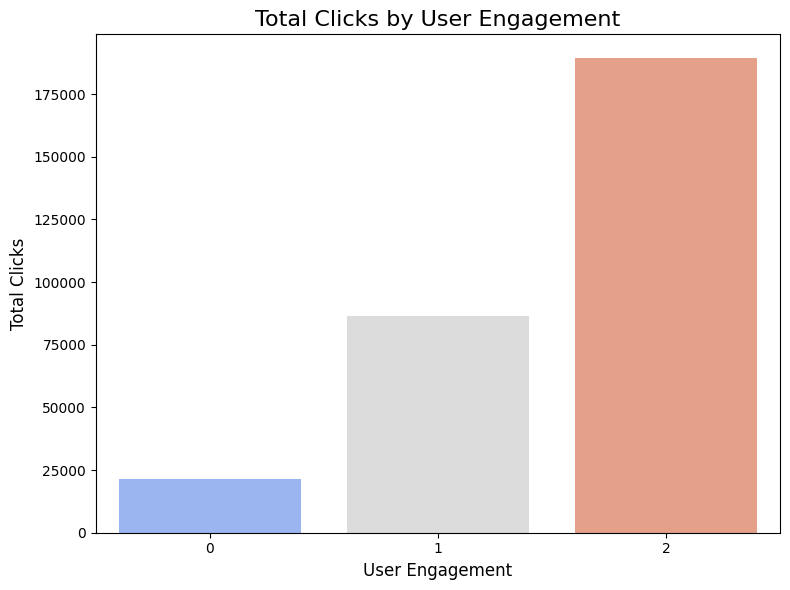

In [ ]:
clicks_by_engagement = df.groupby('user_engagement', as_index=False)['clicks'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='user_engagement', y='clicks', data=clicks_by_engagement, palette='coolwarm')
plt.title('Total Clicks by User Engagement', fontsize=16)
plt.xlabel('User Engagement', fontsize=12)
plt.ylabel('Total Clicks', fontsize=12)
plt.tight_layout()
plt.show()

**Insights**
**Maximum Clicks is from user engagement 2**

<ipython-input-1321-d5f9c17b08a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='cost', data=cost_by_month, palette='Blues')


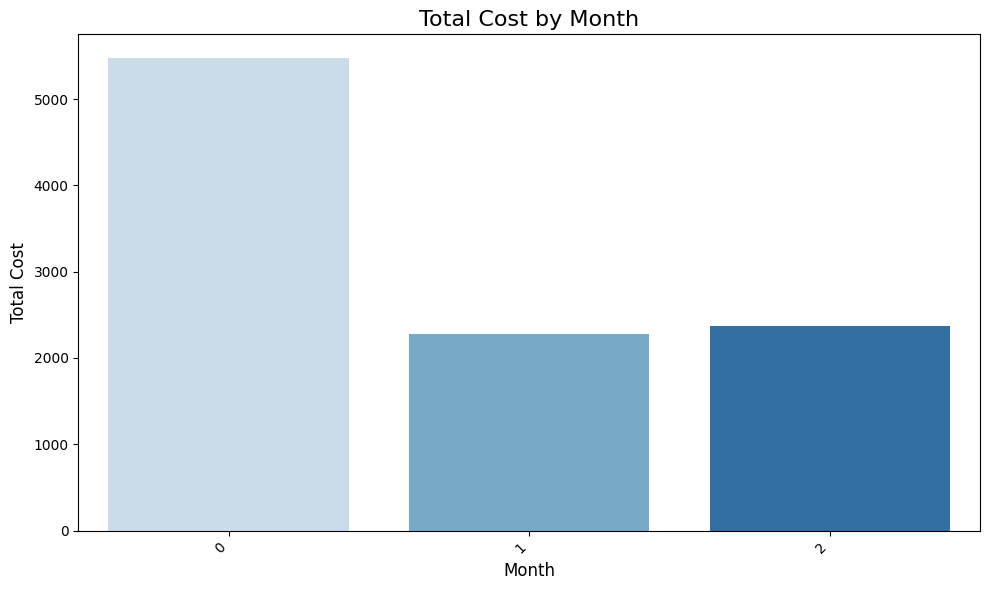

In [ ]:
# Aggregate cost by month
cost_by_month = df.groupby('month', as_index=False)['cost'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cost', data=cost_by_month, palette='Blues')
plt.title('Total Cost by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cost', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insights**
**April has the maximum cost**

<ipython-input-1322-b24e1dc201af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['campaign_number'],palette='rainbow')


<Axes: xlabel='campaign_number', ylabel='count'>

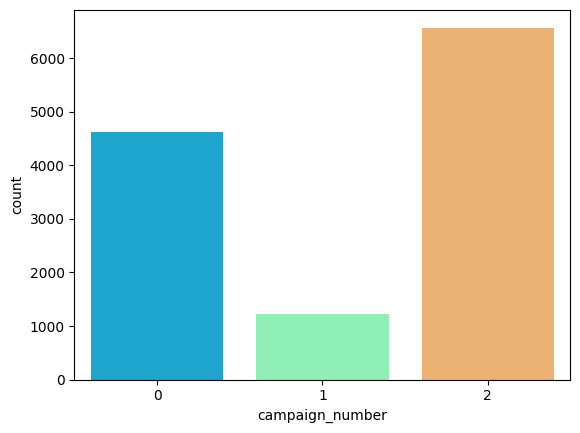

In [ ]:
sns.countplot(x=df['campaign_number'],palette='rainbow')

Campaign 1 and Campaign3 was sold

*   Campaign 1 and Campaign3 was sold in equal amount




<ipython-input-1323-7bd11d6bbc78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['user_engagement'],palette='rainbow')


<Axes: xlabel='user_engagement', ylabel='count'>

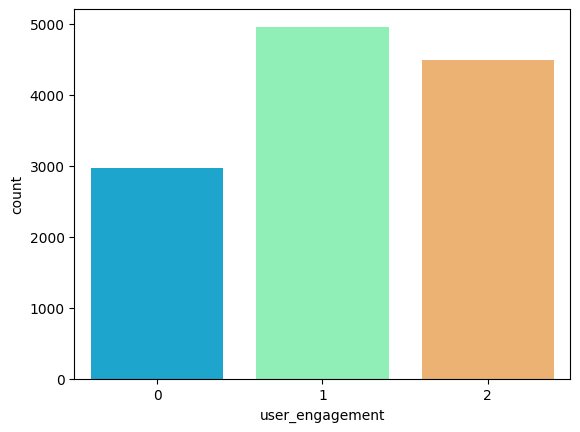

In [ ]:
sns.countplot(x=df['user_engagement'],palette='rainbow')

<ipython-input-1324-d29868abfdb7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['banner'],palette='rainbow')


<Axes: xlabel='banner', ylabel='count'>

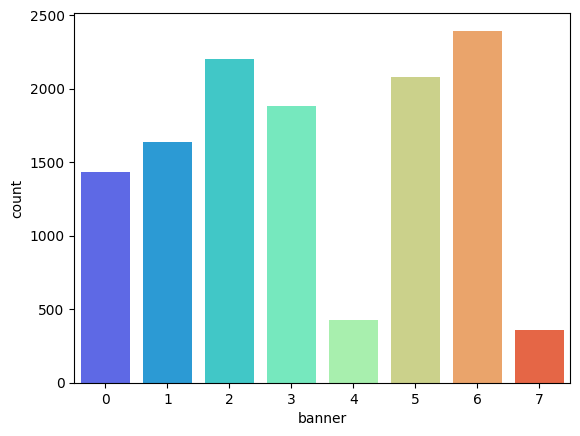

In [ ]:
sns.countplot(x=df['banner'],palette='rainbow')

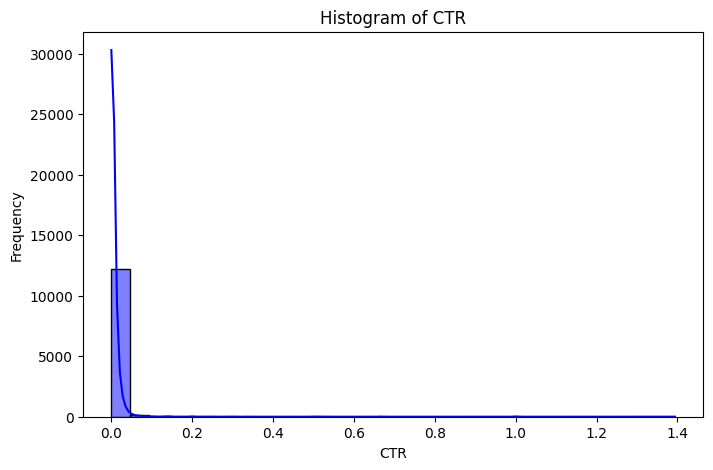

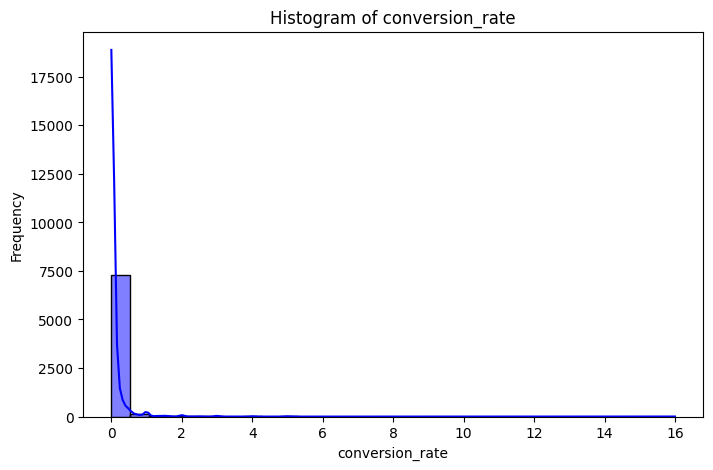

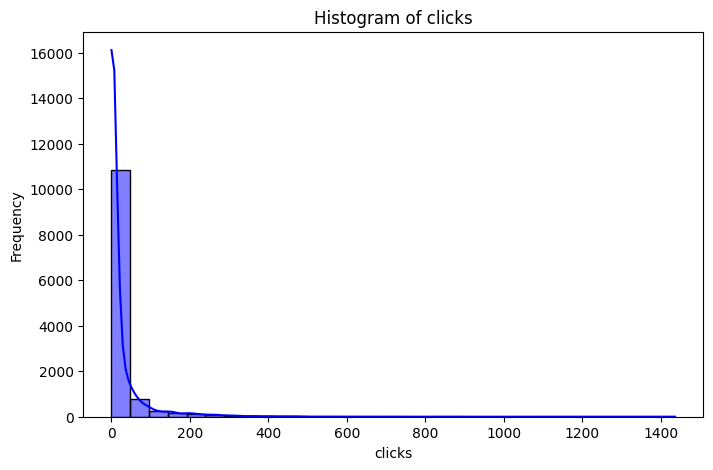

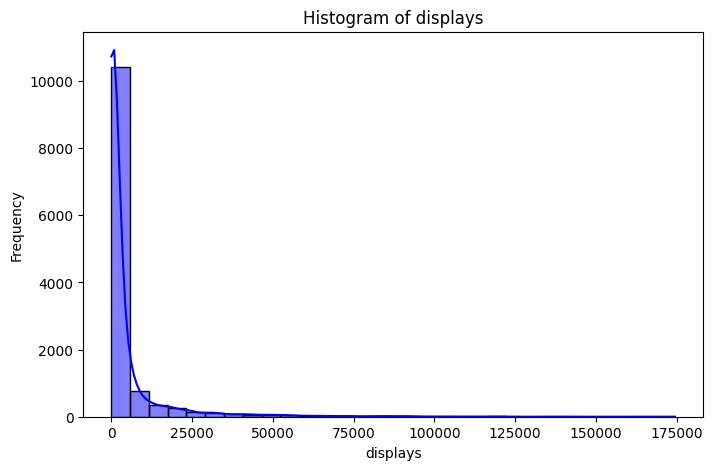

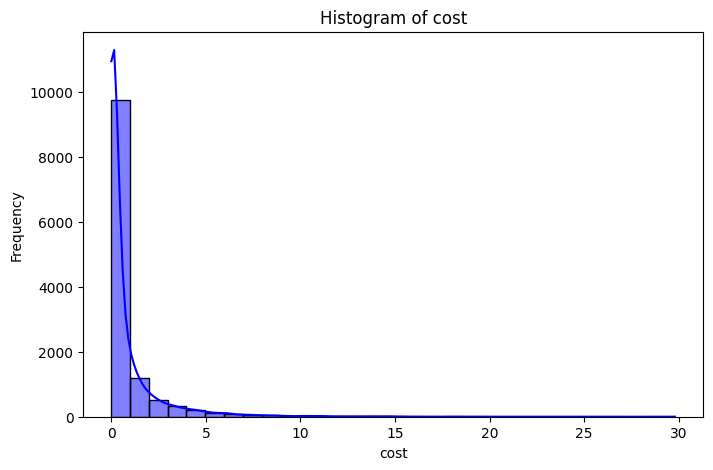

In [ ]:
df['CTR'] = df['clicks'] / df['displays']
df['conversion_rate'] = df.apply(
    lambda row: row['post_click_conversions'] / row['clicks'] if row['clicks'] > 0 else None, axis=1
)

# List of numerical variables for visualization
numerical_vars = ['CTR', 'conversion_rate', 'clicks', 'displays', 'cost']

# Generate histograms
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#Medium was the highest

**Statistical Tests**

It was observed that the average revenue genrated by camp3 is 900.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Load the dataset
df = pd.read_csv("online_advertising_performance_data.csv")

# Clean the dataset
#df = df.drop(columns=['Unnamed: 12', 'Unnamed: 13'], errors='ignore')

# Compute performance metrics
df['CTR'] = df['clicks'] / df['displays']
df['conversion_rate'] = df.apply(
    lambda row: row['post_click_conversions'] / row['clicks'] if row['clicks'] > 0 else None, axis=1
)

# --- Descriptive Statistics ---
# Numerical variables
numerical_summary = df[['CTR', 'conversion_rate', 'clicks', 'revenue', 'displays', 'cost']].describe()

# Categorical variables
categorical_summary = df[['user_engagement', 'banner', 'placement', 'campaign_number']].describe()

# Correlation matrix
correlation_matrix = df[['CTR', 'conversion_rate', 'clicks', 'revenue', 'displays', 'cost']].corr()

print("Descriptive Statistics:")
print("\nNumerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nCorrelation Matrix:\n", correlation_matrix)



Descriptive Statistics:

Numerical Summary:
                 CTR  conversion_rate        clicks       revenue  \
count  1.538700e+04     10513.000000  15408.000000  15408.000000   
mean            inf         0.183139    161.788487     17.929943   
std             NaN         0.461041    728.276911     96.781834   
min    0.000000e+00         0.000000      0.000000      0.000000   
25%    0.000000e+00         0.000000      0.000000      0.000000   
50%    3.612401e-03         0.008929      6.000000      0.483950   
75%    8.555050e-03         0.193548     53.000000      3.839800   
max             inf        16.000000  14566.000000   2096.211600   

            displays          cost  
count   15408.000000  15408.000000  
mean    15512.573014     11.370262  
std     44392.392890     45.369499  
min         0.000000      0.000000  
25%        78.000000      0.024000  
50%      1182.000000      0.339850  
75%      8960.250000      2.536225  
max    455986.000000    556.704800  

Categori

Numerical Columns:

Day: Ranges from 1 to 31, with a mean of 15.52.
Displays: Mean of 15,512.57 with a wide range (min = 0, max = 455,986).
Cost: Mean of 11.37, with a maximum of 556.70.
Clicks: Mean of 161.79, with a maximum of 14,566.
Revenue: Mean of 17.93, with a maximum of 2,096.21.
Post Click Conversions: Mean of 42.30, with a maximum of 3,369.
Post Click Sales Amount: Mean of 2,123.29, with a maximum of 199,930.32.
Categorical Columns:

Month: Includes 3 unique values, with "April" as the most frequent (6,269 entries).
Campaign Number: 3 unique campaigns, with "camp 3" being the most frequent (6,917 entries).
User Engagement: 3 unique levels, with "Medium" being the most common (5,489 entries).
Banner: 8 unique banner types, with "728 x 90" appearing most frequently (3,142 entries).
Placement: 5 unique placements, with "mno" being the most common (4,501 entries).

**Inferential Statistics **





In [ ]:
df.describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13,CTR,conversion_rate
count,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,0.0,0.0,1.538700e+04,10513.000000
mean,15.518886,15512.573014,11.370262,161.788487,17.929943,42.300623,2123.288058,NaN,NaN,inf,0.183139
std,8.740909,44392.392890,45.369499,728.276911,96.781834,213.685660,10523.029607,NaN,NaN,NaN,0.461041
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000
25%,8.000000,78.000000,0.024000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000
50%,15.000000,1182.000000,0.339850,6.000000,0.483950,0.000000,0.000000,NaN,NaN,3.612401e-03,0.008929
75%,23.000000,8960.250000,2.536225,53.000000,3.839800,3.000000,163.351200,NaN,NaN,8.555050e-03,0.193548
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,NaN,NaN,inf,16.000000


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Compute performance metrics
df['CTR'] = df['clicks'] / df['displays']  # Click-Through Rate
df['conversion_rate'] = df.apply(
    lambda row: row['post_click_conversions'] / row['clicks'] if row['clicks'] > 0 else None, axis=1
)

# Separate the groups based on user engagement
high_engagement = df[df['user_engagement'] == 'High']
low_engagement = df[df['user_engagement'] == 'Low']

# Perform t-tests
ctr_ttest = ttest_ind(
    high_engagement['CTR'].dropna(),
    low_engagement['CTR'].dropna(),
    equal_var=False  # Welch's t-test for unequal variances
)

conversion_rate_ttest = ttest_ind(
    high_engagement['conversion_rate'].dropna(),
    low_engagement['conversion_rate'].dropna(),
    equal_var=False
)

# Display the results
print("CTR T-test:")
print(f"T-statistic: {ctr_ttest.statistic}, P-value: {ctr_ttest.pvalue}\n")

print("Conversion Rate T-test:")
print(f"T-statistic: {conversion_rate_ttest.statistic}, P-value: {conversion_rate_ttest.pvalue}")


CTR T-test:
T-statistic: nan, P-value: nan

Conversion Rate T-test:
T-statistic: 30.46749543332265, P-value: 6.7298111613514276e-186


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Statistical Test

#**It was observed that average clicks generated by camp1 is 161** Is it still the **same**?

**Null Hypothesis :The mean is 25**

*  **Null Hypothesis :The mean is 161**
*   **Alternate** Hypothesis: The mean is not 161



We need to grab the data for user_engagement high and campaign by camp1

**For t test we must have sample size as 25**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col_list=['month','day','campaign_number','user_engagement','banner','placement']

In [ ]:
for i in col_list:
  df[i]=le.fit_transform(df[i])

In [ ]:
new_df=df.loc[(df['campaign_number']==0)&(df['user_engagement']==2)]

In [ ]:
new_df.shape

(2253, 16)

In [ ]:
sample_df=new_df.sample(25,random_state=0)

In [ ]:
sample_df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13,CTR,conversion_rate
12611,1,10,0,2,6,4,12139,3.6768,62,6.7813,10,812.2145,NaN,NaN,0.005108,0.161290
5295,0,25,0,2,6,3,2813,1.0918,21,3.9366,1,64.7278,NaN,NaN,0.007465,0.047619
4593,0,22,0,2,0,4,13391,6.9842,135,25.4541,14,920.3475,NaN,NaN,0.010081,0.103704
9646,2,22,0,2,2,4,16973,8.8400,142,15.1594,25,741.3174,NaN,NaN,0.008366,0.176056
10686,2,29,0,2,1,3,2666,1.4626,55,5.9935,13,662.7272,NaN,NaN,0.020630,0.236364
6450,2,1,0,2,2,3,153,0.0777,1,0.1859,0,0.0000,NaN,NaN,0.006536,0.000000
11329,1,2,0,2,3,1,52,0.0060,0,0.0000,0,0.0000,NaN,NaN,0.000000,NaN
7852,2,10,0,2,5,3,19,0.0129,0,0.0000,0,0.0000,NaN,NaN,0.000000,NaN
7051,2,5,0,2,1,4,16295,15.4572,151,28.1572,17,1911.0431,NaN,NaN,0.009267,0.112583
1934,0,9,0,2,5,3,17,0.0103,0,0.0000,0,0.0000,NaN,NaN,0.000000,NaN


In [ ]:
proposed_mean=161

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
tstatistics_value,p_value=ttest_1samp(sample_df['clicks'],proposed_mean)

In [ ]:
if p_value>0.05:
  print("Failed to Reject Null Hypotheisis,there is  enough evidence to conclude that the average is  161")
else:
  print('Reject the Null Hypotheisis,there is  enough evidence to conclude that the average is  161')




Reject the Null Hypotheisis,there is  enough evidence to conclude that the average is  161


In [ ]:
print(f'the Pvalue', {p_value})

the Pvalue {9.090894684523619e-07}



2)
#  ** It was observed that the percentage of clicks genrated by camp1  that is more than 100 was 8% .Is it still the same? **



#Performing t test for 1 sample

In [ ]:
#people having revenue more than 900

In [ ]:
new_df=df[(df['clicks']>100)]

In [ ]:
new_df.shape

(2743, 16)

In [ ]:
#how many are from camp 2

In [ ]:
count=new_df['campaign_number'].value_counts()[0]

In [ ]:
count

1549

In [ ]:
#number of observations

In [ ]:
nobs=len(new_df['campaign_number'])

#Percentage distribution

In [ ]:
new_df['campaign_number'].value_counts()/nobs

,count
campaign_number,
0,0.564710
1,0.236238
2,0.199052


In [ ]:
p0=8

**Null Hypothesis :The proportion of camp1 is 8%**

---


*   **Alternate Hypothesis: The proportion of camp1 is not 8% **

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
z_stats,p_value=proportions_ztest(count,nobs,p0)

In [ ]:
if p_value>0.05:
  print("Failed to Reject Null Hypotheisis,there is enough evidence to conclude that camp1 proportion is 8% ")
else:
  print('Reject the Null Hypotheisis,there is   not enough evidence to conclude that the camp1 proportion  is  8%')


Reject the Null Hypotheisis,there is   not enough evidence to conclude that the camp1 proportion  is  8%


In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13,CTR,conversion_rate
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,NaN,NaN,0.000000,NaN
1,0,0,0,0,0,1,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN,0.007833,0.145570
2,0,0,0,0,0,2,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN,0.010748,0.493671
3,0,0,0,0,0,4,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN,0.010487,0.343541
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,NaN,NaN,0.001812,0.000000


**Are the variance of clicks significantly different between camp1 and camp 2   with high user engagement**

Null Hypothesis:Clicks will be equal




Alternate hypothesis:Clicks will not be equal

In [ ]:
new_df_camp2=df[(df['campaign_number']==1) & (df['user_engagement']==2)]

In [ ]:
new_df_camp2.shape

(853, 16)

In [ ]:
new_df_camp1=df[(df['campaign_number']==0) & (df['user_engagement']==2)]

In [ ]:
new_df_camp1.shape

(2253, 16)

**Sampling**

In [ ]:
sample_camp2=new_df_camp2.sample(500,random_state=0)
sample_camp1=new_df_camp1.sample(500,random_state=0)

In [ ]:
a=sample_camp2['clicks'].var()
b=sample_camp1['clicks'].var()

In [ ]:
print(f'Variance of camp2,{a}')
print(f'Variance of camp1,{b}')

Variance of camp2,2657442.3739118264
Variance of camp1,10615.622745490982


In [ ]:
from scipy.stats import f


In [ ]:
F=a/b

In [ ]:
print(f"Ftest statistics",{F})

Ftest statistics {250.3331587438507}


In [ ]:
dof_camp1=len(sample_camp1)-1

In [ ]:
dof_camp2=len(sample_camp2)-1

In [ ]:
import scipy
p_value=scipy.stats.f.cdf(F,dof_camp1,dof_camp2)

In [ ]:
if p_value>0.05:
  print('Failed to reject Null hypothesis,using this we can conclude there is enough evidences to conclude that clicks will be equal for high user engagement')
else:
  print('Reject the null Hypotheisis there is not enough evidence to conclude that spends are same in both the clicks will be equal for high user engagements ')

Failed to reject Null hypothesis,using this we can conclude there is enough evidences to conclude that clicks will be equal for high user engagement


**Performing using TTest_ind**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stats,p_value=ttest_ind(sample_camp1['clicks'],sample_camp2['clicks'],equal_var=False)

In [ ]:
if p_value>0.05:
  print('Failed to reject Null hypothesis,using this we can conclude there is enough evidences to conclude that clicks will be equal for high user engagement')
else:
  print('Reject the null Hypotheisis there is not enough evidence to conclude that spends are same in both the clicks will be equal for high user engagements ')

Reject the null Hypotheisis there is not enough evidence to conclude that spends are same in both the clicks will be equal for high user engagements 


**Is the percentage of camp2 who have clicks more than 120 the same for high and meduim user Engagement **

**Null Hypothesis: Percentage will remain the same**
**Alternate** Hypothesis:Percentage will not remain the same





In [ ]:
new_df_high_user=df[(df['campaign_number']==1) & (df['user_engagement']==2) & (df['clicks']>120)]

In [ ]:
new_df_low_user=df[(df['campaign_number']==1) & (df['user_engagement']==1) & (df['clicks']>120)]

In [ ]:
new_df_high_user.shape

(451, 16)

In [ ]:
new_df_low_user.shape

(165, 16)

In [ ]:
new_df_high_user_sample=new_df_high_user.sample(100,random_state=0)

In [ ]:
new_df_high_user_sample=new_df_high_user.sample(100,random_state=0)

count and nobs

In [ ]:
count=[(new_df_high_user_sample['campaign_number']==1).sum(),(new_df_high_user_sample['campaign_number']==1).sum()]

In [ ]:
count

[100, 100]

In [ ]:
nobs=[len(new_df_high_user),len(new_df_high_user)]

In [ ]:
z_stats,p_val=proportions_ztest(count,nobs,alternative='two-sided')

In [ ]:
if p_val>0.05:
  print('Failed to reject Null hypothesis,using this we can conclude there is enough evidences to conclude that percentage will remain the same')
else:
  print('Reject the null Hypotheisis there is not enough evidence to conclude that percentage will not remain the same')

Failed to reject Null hypothesis,using this we can conclude there is enough evidences to conclude that percentage will remain the same


In [ ]:
print("P value",p_val)

P value 1.0


 # Devise a strategy and machine learning model that will solve the business
 problem. **bold text**



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13,CTR,conversion_rate
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,NaN,NaN,0.000000,NaN
1,0,0,0,0,0,1,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN,0.007833,0.145570
2,0,0,0,0,0,2,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN,0.010748,0.493671
3,0,0,0,0,0,4,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN,0.010487,0.343541
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,NaN,NaN,0.001812,0.000000


In [ ]:
df=df.drop('Unnamed: 12',axis=1)

In [ ]:
df=df.drop('Unnamed: 13',axis=1)

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR,conversion_rate
0,0,0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000,0.000000,NaN
1,0,0,0,0,0,1,20170,26.7824,158,28.9717,23,1972.4602,0.007833,0.145570
2,0,0,0,0,0,2,14701,27.6304,158,28.9771,78,2497.2636,0.010748,0.493671
3,0,0,0,0,0,4,171259,216.8750,1796,329.4518,617,24625.3234,0.010487,0.343541
4,0,0,0,1,0,1,552,0.0670,1,0.1834,0,0.0000,0.001812,0.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
a=df.drop('post_click_conversions' ,axis=1)

In [ ]:
b=df['post_click_conversions']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
X_train

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_sales_amount,CTR,conversion_rate
5481,0,26,0,1,4,4,483,0.1946,6,1.1215,0.0000,0.012422,0.000000
7504,2,8,0,2,1,1,3770,1.8051,15,2.7952,1098.0712,0.003979,0.333333
11999,1,6,2,0,2,2,1851,1.8444,16,0.8625,7.6553,0.008644,0.062500
13193,1,14,0,0,2,1,23386,13.0325,65,7.0000,2419.5312,0.002779,0.938462
11386,1,2,2,0,2,1,2700,0.7657,4,0.2132,0.0000,0.001481,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,2,12,2,0,1,1,3727,0.7719,9,0.4881,0.0000,0.002415,0.000000
7384,2,7,0,0,5,3,163,0.1187,2,0.0000,0.0000,0.012270,0.000000
7683,2,9,0,2,3,4,794,0.1590,1,0.1861,0.0000,0.001259,0.000000
1156,0,5,1,2,5,3,516,0.3330,16,0.6131,0.0000,0.031008,0.000000


In [ ]:
# Check for infinite or NaN values in X
print(np.isinf(X_train).sum())  # Count of infinite values
print(np.isnan(X_train).sum())  # Count of NaN values

# Check for maximum and minimum values
print("Max value:", np.max(X_train))
print("Min value:", np.min(X_train))


month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_sales_amount    0
CTR                        1
conversion_rate            0
dtype: int64
month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_sales_amount    0
CTR                        0
conversion_rate            0
dtype: int64
Max value: inf
Min value: 0.0


In [ ]:
# Replace infinite values with a large finite number
X_train = np.where(np.isinf(X_train), np.nan, X_train)  # Replace Inf/-Inf with NaN
X_train = np.nan_to_num(X_train, nan=np.mean(X_train))  # Replace NaN with column mean


In [ ]:
X_train

array([[0.00000000e+00, 2.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 1.24223602e-02, 0.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 0.00000000e+00, ...,
        1.09807120e+03, 3.97877984e-03, 3.33333333e-01],
       [1.00000000e+00, 6.00000000e+00, 2.00000000e+00, ...,
        7.65530000e+00, 8.64397623e-03, 6.25000000e-02],
       ...,
       [2.00000000e+00, 9.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.25944584e-03, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 3.10077519e-02, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 2.00000000e+00, ...,
        0.00000000e+00, 4.14276609e-03, 0.00000000e+00]])

In [ ]:
y_train

,post_click_conversions
5481,0
7504,5
11999,1
13193,61
11386,0
...,...
8190,0
7384,0
7683,0
1156,0


In [ ]:
# Replace NaN with 0 (or any other number)
X_train = np.nan_to_num(X_train, nan=0)


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_sales_amount,CTR,conversion_rate
4839,0,23,0,1,4,4,306,0.1293,2,0.3770,0.0000,0.006536,0.000000
7866,2,10,0,2,6,2,9613,10.7232,164,30.3541,646.3212,0.017060,0.097561
38,0,0,0,0,3,4,4177,2.5521,7,1.2843,0.0000,0.001676,0.000000
3210,0,15,1,2,1,1,40573,11.0330,902,36.0739,470.4816,0.022232,0.011086
4041,0,19,1,2,1,2,180142,156.6477,7881,317.6668,9424.1959,0.043749,0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0,9,2,2,6,2,1722,1.5704,17,0.8884,0.0000,0.009872,0.000000
14535,1,23,2,2,2,1,2352,0.2993,16,0.8772,0.0000,0.006803,0.000000
7498,2,8,0,0,1,3,26212,13.4602,182,34.0000,12662.9624,0.006943,0.598901
14616,1,24,0,0,4,4,17784,31.0036,133,14.0000,10624.3031,0.007479,1.721805


In [ ]:
y_pred=lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_pred

array([ -3.11098022,  17.79453052,  -1.36182072, ..., 251.37102773,
       215.74915331,  31.8472498 ])

In [ ]:
y_test

,post_click_conversions
4839,0
7866,16
38,0
3210,10
4041,107
...,...
2082,0
14535,0
7498,109
14616,229


In [ ]:
accuracy=r2_score(y_test,y_pred)

In [ ]:
print(accuracy)

0.9900115889459462


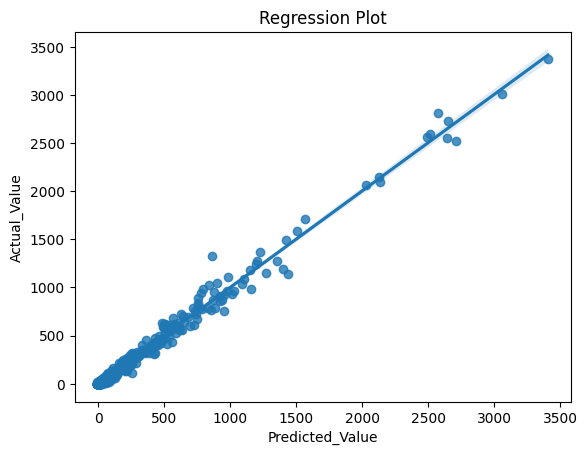

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predicted_Value')
plt.ylabel('Actual_Value')
plt.title('Regression Plot')
plt.show()


Example: Business Strategy for Advertising Campaign
Business Problem: Predict the revenue generated by an advertising campaign based on features such as ad spend, impressions, clicks, and conversions.
Data: We will use features like ad spend, impressions, clicks, conversions to predict revenue.
Model: We can start with a Linear Regression model, but if the relationships are non-linear, we will move to Random Forest Regressor or Gradient Boosting.
Metrics: We will evaluate the model's performance using R² Score and Mean Squared Error (MSE).
Deployment: The model will be deployed to predict future campaign revenue, and businesses can use these predictions for better budgeting and optimization.


Summary of the Machine Learning Strategy
Understand the business problem: Define clear objectives and metrics.
Data Preprocessing: Handle missing data, scale features, and perform feature engineering.
Model Selection: Choose a model appropriate for the task (e.g., regression for predicting continuous variables).
Model Evaluation: Use metrics like R², MSE, and other relevant business KPIs.
Hyperparameter Tuning: Optimize model performance using cross-validation and grid search.
Deployment: Deploy the model into a production environment to make real-time predictions